# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,mean_absolute_percentage_error
plt.style.use('dark_background')
warnings.filterwarnings('ignore')
colors = ['#306754','#151B54','#66CDAA','#033E3E', '#E2F516', '#EE9A4D']

# Data Description

### Table **flights**

Variables:

- **fl_date**: Flight Date (yyyy-mm-dd)
- **mkt_unique_carrier**: Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **branded_code_share**: Reporting Carrier Operated or Branded Code Share Partners
- **mkt_carrier**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **mkt_carrier_fl_num**: Flight Number
- **op_unique_carrier**: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **tail_num**: Tail Number
- **op_carrier_fl_num**: Flight Number
- **origin_airport_id**: Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **origin**: Origin Airport
- **origin_city_name**: Origin Airport, City Name
- **dest_airport_id**: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.
- **dest**: Destination Airport
- **dest_city_name**: Destination Airport, City Name
- **crs_dep_time**: CRS Departure Time (local time: hhmm)
- **dep_time**: Actual Departure Time (local time: hhmm)
- **dep_delay**: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.	
- **taxi_out**: Taxi Out Time, in Minutes
- **wheels_off**: Wheels Off Time (local time: hhmm)
- **wheels_on**: Wheels On Time (local time: hhmm)
- **taxi_in**: 	Taxi In Time, in Minutes
- **crs_arr_time**: CRS Arrival Time (local time: hhmm)
- **arr_time**: Actual Arrival Time (local time: hhmm)
- **arr_delay**: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
- **cancelled**: Cancelled Flight Indicator (1=Yes)
- **cancellation_code**: Specifies The Reason For Cancellation
- **diverted**: Diverted Flight Indicator (1=Yes)
- **dup**: Duplicate flag marked Y if the flight is swapped based on Form-3A data
- **crs_elapsed_time**: CRS Elapsed Time of Flight, in Minutes
- **actual_elapsed_time**: Elapsed Time of Flight, in Minutes
- **air_time**: Flight Time, in Minutes
- **flights**: Number of Flights
- **distance**: Distance between airports (miles)
- **carrier_delay**: Carrier Delay, in Minutes
- **weather_delay**: Weather Delay, in Minutes
- **nas_delay**: National Air System Delay, in Minutes
- **security_delay**: Security Delay, in Minutes
- **late_aircraft_delay**: Late Aircraft Delay, in Minutes
- **first_dep_time**: First Gate Departure Time at Origin Airport
- **total_add_gtime**: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
- **longest_add_gtime**: Longest Time Away from Gate for Gate Return or Cancelled Flight


In [131]:
flights = pd.read_csv(r'Data\flights-2018-12-16 to 2019-01-15.csv')
flights_test_0 = pd.read_csv(r'Data\flights_test.csv')
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-12-16,HA,HA,HA,197,HA,N478HA,197,12758,KOA,...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-16,UA,UA_CODESHARE,UA,4119,EV,N14993,4119,11618,EWR,...,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-16,UA,UA_CODESHARE,UA,4293,EV,N24103,4293,11267,DAY,...,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-16,AA,AA_CODESHARE,AA,4667,YX,N407YX,4667,11278,DCA,...,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-16,NK,NK,NK,428,NK,N637NK,428,15304,TPA,...,1306.0,3.0,0.0,1.0,0.0,37.0,NaN,NaN,NaN,NaN


In [132]:
flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,651320.000000,651320.000000,651320.000000,651320.000000,651320.000000,644096.000000,644096.000000,643896.000000,643896.000000,643354.000000,...,651320.000000,122308.000000,122308.000000,122308.000000,122308.000000,122308.000000,3999.000000,3998.000000,3999.000000,0.0
mean,2828.827845,2828.908518,12698.272611,12698.134593,1329.079941,1334.536091,9.673237,17.885666,1359.530258,1467.508154,...,783.001293,19.622298,3.157937,14.099969,0.116084,25.576716,1277.210803,34.469735,34.004751,NaN
std,1898.611558,1898.924357,1520.554669,1520.524783,488.509293,499.879539,44.792566,10.025506,500.563985,527.263511,...,591.098106,59.841262,31.584947,30.816364,3.309086,50.395535,514.398565,28.459443,27.333254,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-60.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,NaN
25%,1171.000000,1171.000000,11292.000000,11292.000000,920.000000,922.000000,-6.000000,12.000000,938.000000,1051.000000,...,347.000000,0.000000,0.000000,0.000000,0.000000,0.000000,820.000000,16.000000,16.000000,NaN
50%,2411.000000,2411.000000,12889.000000,12889.000000,1322.000000,1329.000000,-2.000000,15.000000,1343.000000,1506.000000,...,621.000000,1.000000,0.000000,3.000000,0.000000,4.000000,1233.000000,27.000000,27.000000,NaN
75%,4471.000000,4472.000000,14057.000000,14057.000000,1734.000000,1741.000000,7.000000,21.000000,1756.000000,1910.000000,...,1021.000000,17.000000,0.000000,18.000000,0.000000,31.000000,1721.500000,43.000000,43.000000,NaN
max,9401.000000,9401.000000,16218.000000,16218.000000,2359.000000,2400.000000,1789.000000,181.000000,2400.000000,2400.000000,...,4983.000000,1767.000000,1390.000000,1447.000000,816.000000,1437.000000,2358.000000,297.000000,190.000000,NaN


In [133]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651320 entries, 0 to 651319
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              651320 non-null  object 
 1   mkt_unique_carrier   651320 non-null  object 
 2   branded_code_share   651320 non-null  object 
 3   mkt_carrier          651320 non-null  object 
 4   mkt_carrier_fl_num   651320 non-null  int64  
 5   op_unique_carrier    651320 non-null  object 
 6   tail_num             650458 non-null  object 
 7   op_carrier_fl_num    651320 non-null  int64  
 8   origin_airport_id    651320 non-null  int64  
 9   origin               651320 non-null  object 
 10  origin_city_name     651320 non-null  object 
 11  dest_airport_id      651320 non-null  int64  
 12  dest                 651320 non-null  object 
 13  dest_city_name       651320 non-null  object 
 14  crs_dep_time         651320 non-null  int64  
 15  dep_time         

In [134]:
flights['cancelled'].value_counts()

0.0    643764
1.0      7556
Name: cancelled, dtype: int64

#### For modeling we only Keep the flights_tests fields and 7 fields related to delay types for for possible future predictions:
**(carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, first_dep_time, dep_delay, cancelled)**

In [135]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [136]:
flights_train_1 = flights.drop(['dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'cancellation_code', 'diverted', 'actual_elapsed_time', 'air_time', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)
flights_test_1= flights_test_0.copy()

#flights_train_1.head()
flights_test_1.head()




,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


#### We can create a categorical field including  all types of delays, but at this project because our target is arr_delay we only keep this field.

In [137]:
flights_train = flights_train_1.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'dep_delay', 'cancelled'], axis=1)
flights_train.head()
flights_train.shape

(651320, 21)

### checking correlation between target and independent features

In [138]:
flights_train.corr()['arr_delay'].sort_values()



crs_elapsed_time     -0.039159
distance             -0.027106
dest_airport_id       0.006583
origin_airport_id     0.015834
op_carrier_fl_num     0.052669
mkt_carrier_fl_num    0.052685
crs_arr_time          0.061357
crs_dep_time          0.078347
arr_delay             1.000000
flights                    NaN
Name: arr_delay, dtype: float64

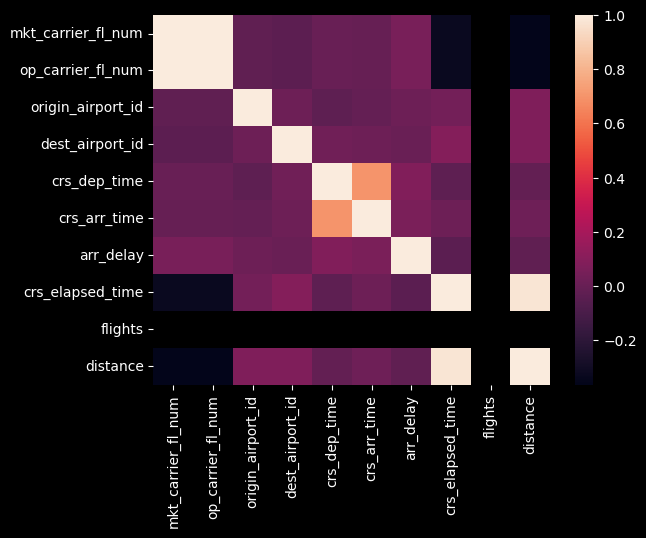

In [139]:
corr=flights_train.corr()
sns.heatmap(corr)
plt.show()

### Missing value detection and handling

In [140]:
missing=flights_train.isnull().sum()
missing

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num               862
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
crs_arr_time             0
arr_delay             9168
dup                      0
crs_elapsed_time         0
flights                  0
distance                 0
dtype: int64

In [141]:

missing_value_percent = (flights_train.isnull().sum()/flights_train.isnull().count()).sort_values(ascending=False)
missing_value_percent=pd.DataFrame(missing_value_percent,columns = ['missing_percent'])
missing_value_percent[missing_value_percent['missing_percent']>0] 


,missing_percent
arr_delay,0.014076
tail_num,0.001323


#### Since a very small percentage of data is missing, therefore we remove records include missing values

In [144]:
flights_train=flights_train.dropna(axis=0)
flights_train.shape

(642152, 21)

#### Doing the same for flights_test_1 data, removing missing values

In [145]:

missing_test = flights_test_1.isnull().sum()
missing_test

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num              1499
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
crs_arr_time             0
dup                      0
crs_elapsed_time         0
flights                  0
distance                 0
dtype: int64

In [146]:

flights_test=flights_test_1.dropna(axis=0)
print(flights_test_1.shape)
print(flights_test.shape)
#flights_test.describe()

(660556, 20)
(659057, 20)


#### Outlier detection also was done in EDA notebook

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [147]:

#flights_train.fl_date = pd.to_datetime(flights_train.fl_date, format='%Y-%m-%d')
#flights_test.fl_date = pd.to_datetime(flights_test.fl_date, format='%Y-%m-%d')

In [148]:
#converting fl_date to datetime in order to extract "day of week" and "day of year"
flights_train.fl_date = pd.to_datetime(flights_train.fl_date, format='%Y-%m-%d')
flights_test.fl_date = pd.to_datetime(flights_test.fl_date, format='%Y-%m-%d')

flights_train['fl_day_of_month'] = pd.DatetimeIndex(flights_train.fl_date).day
flights_test['fl_day'] = pd.DatetimeIndex(flights_test.fl_date).day

flights_train['fl_day_of_week'] = flights_train.fl_date.dt.dayofweek
flights_test['fl_day_of_week'] = flights_test.fl_date.dt.dayofweek

flights_train['fl_day_of_year'] = flights_train.fl_date.dt.dayofyear
flights_test['fl_day_of_year'] = flights_test.fl_date.dt.dayofyear

flights_train['fl_month'] = pd.DatetimeIndex(flights_train.fl_date).month
flights_test['fl_month'] = pd.DatetimeIndex(flights_test.fl_date).month
#flights_train.head()

#### classification of 'arr_time' and 'dep_time'

In [149]:
flights_train['crs_arr_hr'] =flights_train['crs_arr_time']//100
flights_train['crs_dep_hr'] =flights_train['crs_dep_time']//100
flights_test['crs_arr_hr'] =flights_test['crs_arr_time']//100
flights_test['crs_dep_hr'] =flights_test['crs_dep_time']//100
#flights_train.head()

#### From EDA task 8, we are binning the 'crs_elapsed_time'

In [150]:
# Define 'SHORT', 'MEDIUM' and 'LONG' haul flights
# 'SHORT' (bin 1) :      for actual_elapsed_time <= 4 hr
# 'MEDIUM' (bin2) :  for 4 hr < actual_elapsed_time <=8
# 'LONG' (bin3) : for 8 hr < actual_elapsed_time

bin_flight_elapsed_time = [-1, 240, 480, 5000]
label_flight_elapsed_time = [1,2,3]
flights_train['flight_elapsed_type'] = pd.cut(flights_train['crs_elapsed_time'], bins=bin_flight_elapsed_time, labels=label_flight_elapsed_time)
flights_train.head()


# Binning 'crs_elapsed_time' for flight_test

bin_flight_elapsed_time = [-1, 240, 480, 5000]
label_flight_elapsed_time = [1,2,3]
flights_test['flight_elapsed_type'] = pd.cut(flights_test['crs_elapsed_time'], bins=bin_flight_elapsed_time, labels=label_flight_elapsed_time)

flights_train['flight_elapsed_type'] = pd.to_numeric(flights_train['flight_elapsed_type'])
#flights_test.head()
flights_train['flight_elapsed_type'].dtypes


dtype('int64')

#### Average of elapsed time in each airport during one day

In [151]:
flights_train['origin_day_avg'] = flights_train.groupby(['origin_airport_id','fl_day_of_week'])['crs_elapsed_time'].transform(np.mean).astype(np.float16)
flights_train['dest_day_avg'] = flights_train.groupby(['dest_airport_id','fl_day_of_week'])['crs_elapsed_time'].transform(np.mean).astype(np.float16)

#for flights_test
flights_test['origin_day_avg'] = flights_test.groupby(['origin_airport_id','fl_day_of_week'])['crs_elapsed_time'].transform(np.mean).astype(np.float16)
flights_test['dest_day_avg'] = flights_test.groupby(['dest_airport_id','fl_day_of_week'])['crs_elapsed_time'].transform(np.mean).astype(np.float16)

#flights_train.head()
#flights_test.head()

#### Number of flights in each airport per day

In [152]:
flights_train['origin_flights_sum'] = flights_train.groupby(['origin_airport_id','fl_day_of_week'])['flights'].transform(np.sum).astype(np.float16)
flights_train['dest_flights_sum'] = flights_train.groupby(['dest_airport_id','fl_day_of_week'])['flights'].transform(np.sum).astype(np.float16)

#for flights_test
flights_test['origin_flights_sum'] = flights_test.groupby(['origin_airport_id','fl_day_of_week'])['flights'].transform(np.sum).astype(np.float16)
flights_test['dest_flights_sum'] = flights_test.groupby(['dest_airport_id','fl_day_of_week'])['flights'].transform(np.sum).astype(np.float16)

#flights_train.head()
#flights_test.head()

#### Extract city and state as seperate fields

In [153]:
flights_train[['origin_city', 'origin_state']] = flights_train['origin_city_name'].str.split(',', expand=True, n=2)
flights_train[['dest_city', 'dest_state']] = flights_train['dest_city_name'].str.split(',', expand=True, n=2)

#for flights_test:
flights_test[['origin_city', 'origin_state']] = flights_test['origin_city_name'].str.split(',', expand=True, n=2)
flights_test[['dest_city', 'dest_state']] = flights_test['dest_city_name'].str.split(',', expand=True, n=2)

#flights_train.head()
#flights_test.head()

In [154]:
print(flights_train['origin_city'].value_counts().shape)
print(flights_train['origin_state'].value_counts().shape)
print(flights_train['mkt_unique_carrier'].value_counts().shape)
print(flights_train['branded_code_share'].value_counts().shape)
print(flights_train['mkt_carrier'].value_counts().shape)
print(flights_train['op_unique_carrier'].value_counts().shape)
print(flights_train['tail_num'].value_counts().shape)


(346,)
(53,)
(10,)
(15,)
(10,)
(26,)
(5816,)


#### as we observe above city and state are high cardinality categorical fields
*----------------------------------------------------------------------------------*

#### Finalizing our data set to use for modeling

In [155]:
flights_train.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'dup', 'crs_elapsed_time', 'flights',
       'distance', 'fl_day_of_month', 'fl_day_of_week', 'fl_day_of_year',
       'fl_month', 'crs_arr_hr', 'crs_dep_hr', 'flight_elapsed_type',
       'origin_day_avg', 'dest_day_avg', 'origin_flights_sum',
       'dest_flights_sum', 'origin_city', 'origin_state', 'dest_city',
       'dest_state'],
      dtype='object')

In [156]:
# drop unuseful fields
extra=['fl_date', 'mkt_unique_carrier', 'branded_code_share','mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name','dest_airport_id', 'dest', 'dest_city_name','dup', 'flights', 'crs_arr_time','crs_dep_time', 'crs_elapsed_time', 'origin_city', 'origin_state', 'dest_city', 'dest_state']

#for train data:
flights_train_final=flights_train.drop(extra, axis=1)
print(flights_train_final.shape)
#flights_train_final.head()

#for test data:
flights_test_final=flights_test.drop(extra, axis=1)
print(flights_test_final.shape)
flights_test_final.head(22)


(642152, 13)
(659057, 12)


,distance,fl_day,fl_day_of_week,fl_day_of_year,fl_month,crs_arr_hr,crs_dep_hr,flight_elapsed_type,origin_day_avg,dest_day_avg,origin_flights_sum,dest_flights_sum
0,363,1,2,1,1,19,18,1,111.7500,198.7500,327.0,2244.0
1,363,1,2,1,1,13,11,1,111.7500,198.7500,327.0,2244.0
2,333,1,2,1,1,21,20,1,111.7500,133.1250,327.0,951.0
3,333,1,2,1,1,14,13,1,111.7500,133.1250,327.0,951.0
4,333,1,2,1,1,10,9,1,111.7500,133.1250,327.0,951.0
5,333,1,2,1,1,7,6,1,111.7500,133.1250,327.0,951.0
6,333,1,2,1,1,17,16,1,111.7500,133.1250,327.0,951.0
7,390,1,2,1,1,16,15,1,111.7500,131.1250,327.0,788.0
8,390,1,2,1,1,13,12,1,111.7500,131.1250,327.0,788.0
9,390,1,2,1,1,9,7,1,111.7500,131.1250,327.0,788.0


### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### PCA

In [157]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [158]:
X = flights_train_final.drop('arr_delay',axis=1)
y = flights_train_final['arr_delay']

In [159]:
MMS=MinMaxScaler()
Xnorm=MMS.fit_transform(X)

In [160]:
pca_model=PCA(n_components=2)
pca_model.fit(X)
X_pca=pca_model.transform(X)
X_pca=pd.DataFrame(X_pca,columns=['PC1','PC2'])
X_pca.head()

,PC1,PC2
0,-383.373607,-1727.982731
1,534.995375,-623.100984
2,-617.988575,-73.314321
3,158.512356,451.396250
4,-165.217007,429.996083


In [161]:
pca_model.explained_variance_ratio_

array([0.59465092, 0.31284564])

Text(0, 0.5, '% Cumulative explained variance')

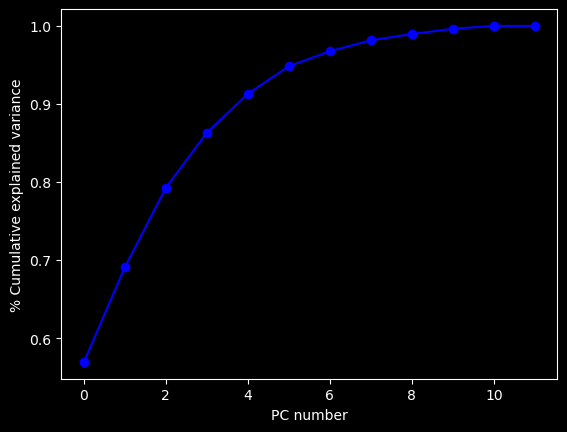

In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA()
pca.fit(Xnorm)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance,'bo-')
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Imprting useful libraries

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Decision Tree Regression

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
tree = DecisionTreeRegressor(random_state=1234, criterion='mse', max_depth=4) # criterion='mae'
pred = cross_val_predict(tree, X, y, cv=5)
rmse=np.sqrt(mean_squared_error(y, pred))
target_avg=y.mean()
mape=rmse/target_avg
print(rmse)
print(target_avg)
print(mape)


47.67104361357637
3.63294048761041
13.121889493139568


### LinearRegression, Lasso, Ridge, ElasticNet

In [81]:
Regressors = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()    
                }

for key, reg in Regressors.items():
    #Reg.fit(X_train, y_train)
    score = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

RMSE score with CV of Linear Regression is 47.0
RMSE score with CV of Lasso is 46.98
RMSE score with CV of Ridge is 47.0
RMSE score with CV of ElasticNet is 46.98


In [41]:
GB = GradientBoostingRegressor(n_estimators=100)
pred = cross_val_predict(GB, X, y, cv=5)
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))


47.13993159994679
24.190053875173692


In [42]:
RandromForest= RandomForestRegressor(n_estimators=100)
pred = cross_val_predict(RandromForest, X, y, cv=5)
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))


55.37547580893527
30.055899182431077


In [ ]:
SVM = SVR()
pred = cross_val_predict(SVM, X, y, cv=5)
print(np.sqrt(mean_squared_error(y, pred)))
print(mean_absolute_error(y, pred))



### Xgboost with cross validation

In [242]:

import xgboost as xgb

# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 

data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True) 


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10) 
pred = cross_val_predict(xg_reg, X, y, cv=5)
print(np.sqrt(mean_squared_error(y, pred)))

rmse = np.sqrt(mean_squared_error(y, pred)) 
print("RMSE: %f" % (rmse)) 






[00:01:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

### Xgboost with train test split

In [240]:
import xgboost as xgb

# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
data_dmatrix = xgb.DMatrix(data=X,label=y, enable_categorical=True) 

#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10) 
xg_reg1.fit(X_train,y_train) 
pred = xg_reg1.predict(X_test) 

print(np.sqrt(mean_squared_error(y_test, pred)))






[00:00:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
46.252539090436834


[00:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


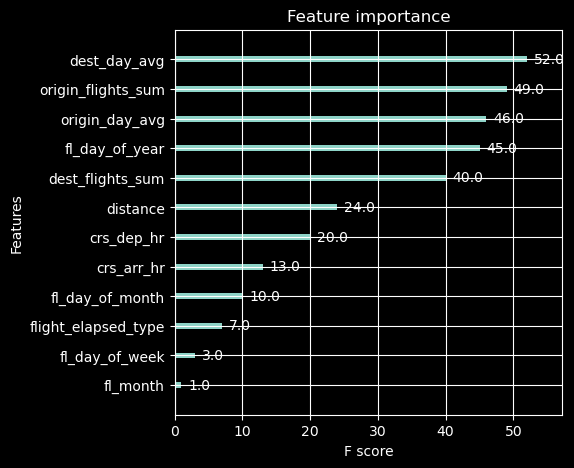

In [243]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10) 



import matplotlib.pyplot as plt 



xgb.plot_importance(xg_reg) 

plt.rcParams['figure.figsize'] = [5, 5] 

plt.show()

### Grid Search CV

In [35]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-2214.7054712726053


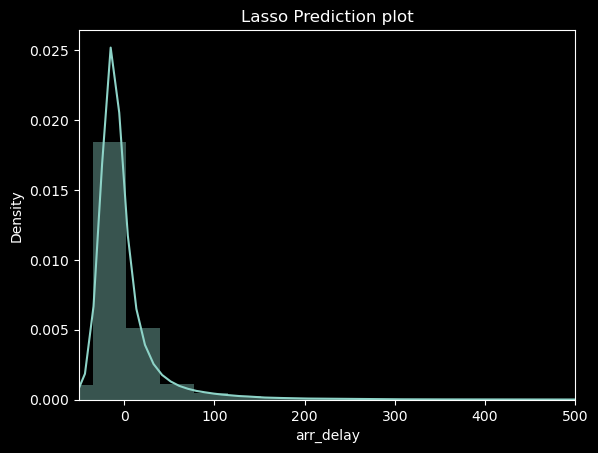

In [82]:
prediction_lasso=lasso_regressor.predict(X)
sns.distplot(y-prediction_lasso)
plt.title("Lasso Prediction plot")
plt.xlim(-50, 500)
plt.show()

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

In [121]:
best_lasso = lasso_regressor.best_estimator_
best_lasso.fit(X,y)
flights_test_final_1_7=flights_test_final[flights_test_final['fl_day']<=7]

pred=best_lasso.predict(flights_test_final_1_7)
pred = pd.DataFrame(pred, columns = ['predicted delay'])
pred.head()




,predicted delay
0,7.634341
1,3.745774
2,6.706255
3,2.753685
4,0.495073


In [122]:
flights_test_2=flights_test_1.dropna(axis=0)
submit=pd.merge(flights_test_2, pred, left_index=True, right_index=True)
submit.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,predicted delay
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,...,14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363,7.634341
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,...,14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363,3.745774
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,...,14831,SJC,"San Jose, CA",2020,2130,N,70,1,333,6.706255
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,...,14831,SJC,"San Jose, CA",1340,1455,N,75,1,333,2.753685
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,...,14831,SJC,"San Jose, CA",915,1035,N,80,1,333,0.495073


In [127]:
import pickle
Delay_Prediction ='finalized_model.pkl'
pickle.dump(best_lasso, open(Delay_Prediction, 'wb'))


ok


======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.